<a href="https://colab.research.google.com/github/Ruchita02-code/Stock-price-Prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-19, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2006-06-12,9.446729,9.668325,9.433359,9.615093,201516513
2006-06-13,9.570030,9.581915,9.362050,9.430883,307512327
2006-06-14,9.517293,9.683428,9.371955,9.651985,312045255
2006-06-15,9.680952,9.711902,9.482876,9.572506,272445379
2006-06-16,9.673525,9.679220,9.606675,9.633910,212979318


In [6]:
google_data.shape

(4780, 5)

In [7]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,4780.000000,4780.000000,4780.000000,4780.000000,4.780000e+03
mean,54.383049,54.944036,53.808504,54.360021,8.164388e+07
std,49.640218,50.186136,49.097472,49.612280,8.833077e+07
min,6.374077,6.669459,6.123017,6.499609,1.584340e+05
25%,14.561045,14.695984,14.436628,14.593851,2.543950e+07
50%,34.735033,35.090914,34.399026,34.739254,4.193600e+07
75%,75.709347,77.614263,75.207832,75.820813,1.064535e+08
max,207.224548,208.212225,203.782599,204.022044,9.349835e+08


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4780 entries, 2006-06-12 to 2025-06-10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   4780 non-null   float64
 1   (High, GOOG)    4780 non-null   float64
 2   (Low, GOOG)     4780 non-null   float64
 3   (Open, GOOG)    4780 non-null   float64
 4   (Volume, GOOG)  4780 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 224.1 KB


In [9]:
google_data.isna().sum()

,,0
Price,Ticker,
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

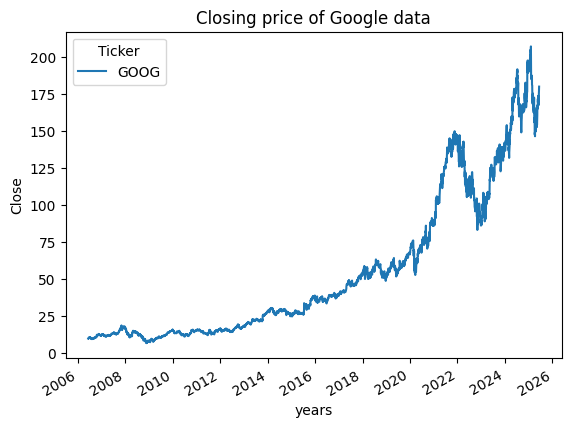

In [11]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [13]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

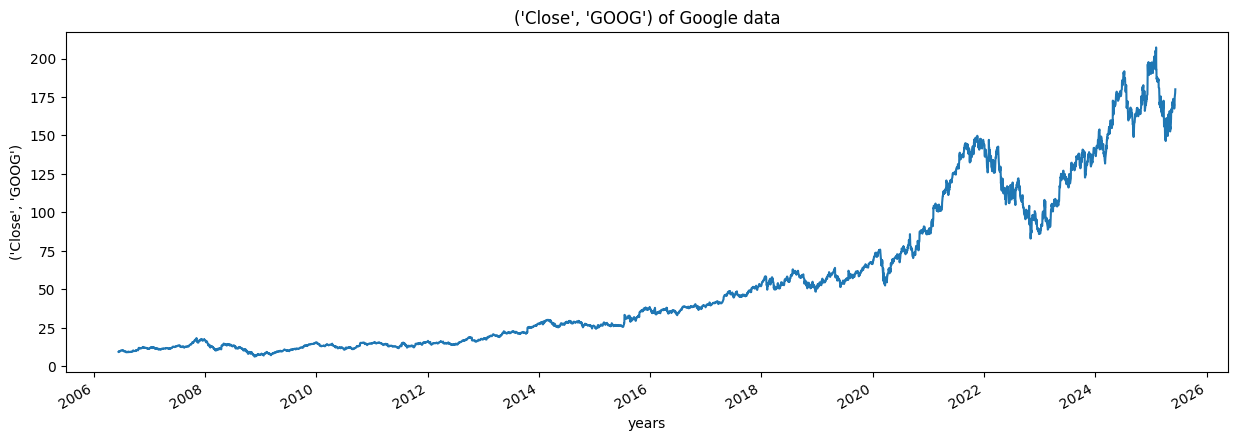

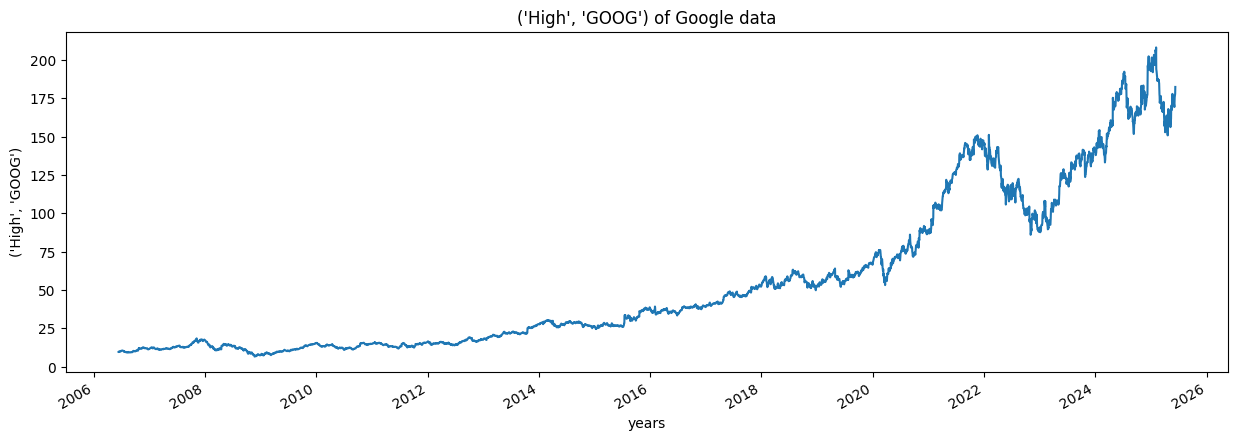

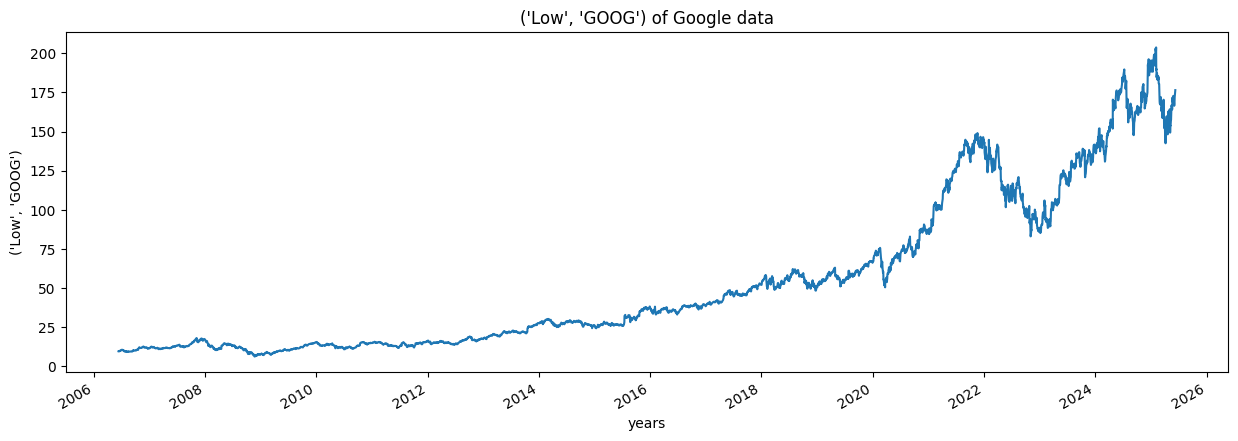

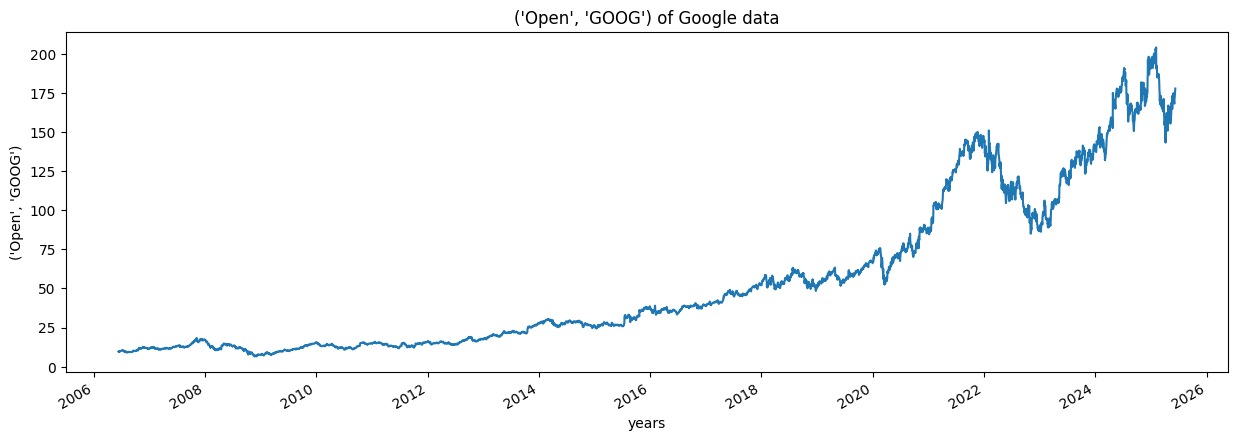

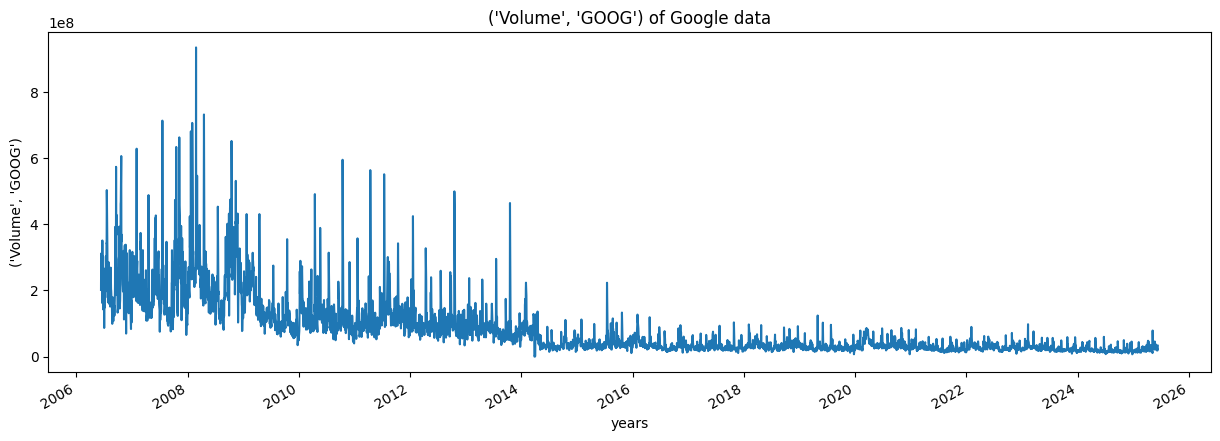

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [15]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [16]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [17]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [18]:
for i in range(2006,2026):
    print(i,list(google_data.index.year).count(i))

2006 141
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252
2025 109


In [19]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [20]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2007-06-04,NaN
2007-06-05,NaN
2007-06-06,NaN
2007-06-07,NaN
2007-06-08,11.052158


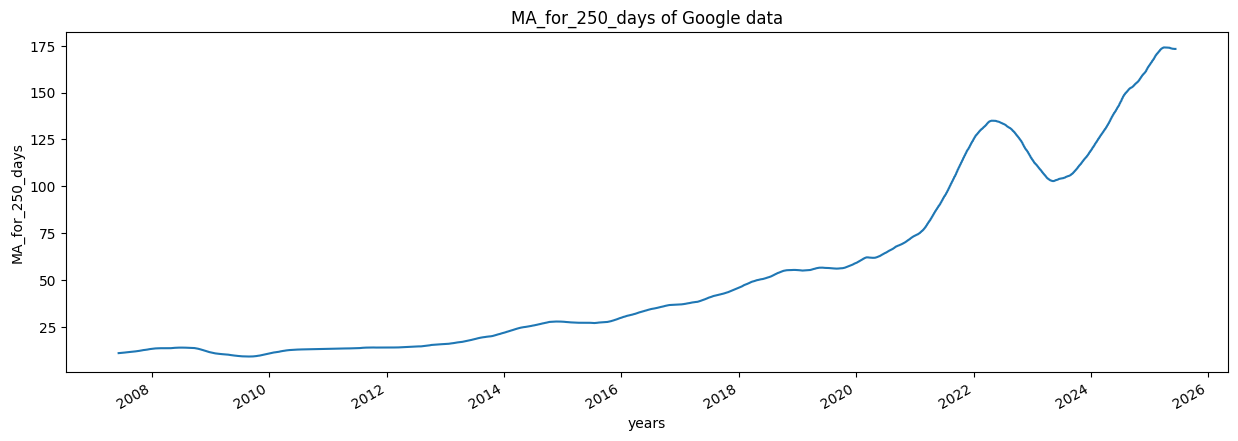

In [21]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

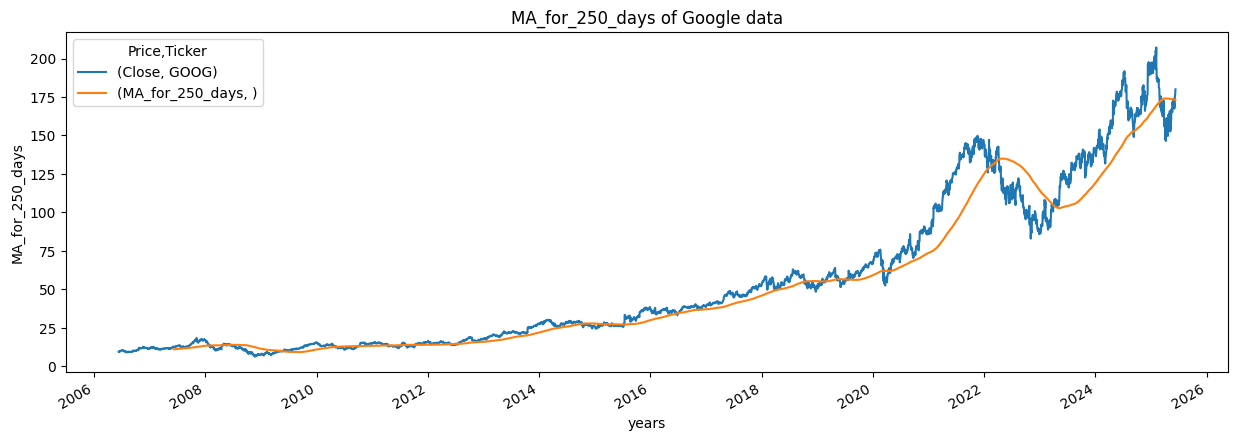

In [22]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

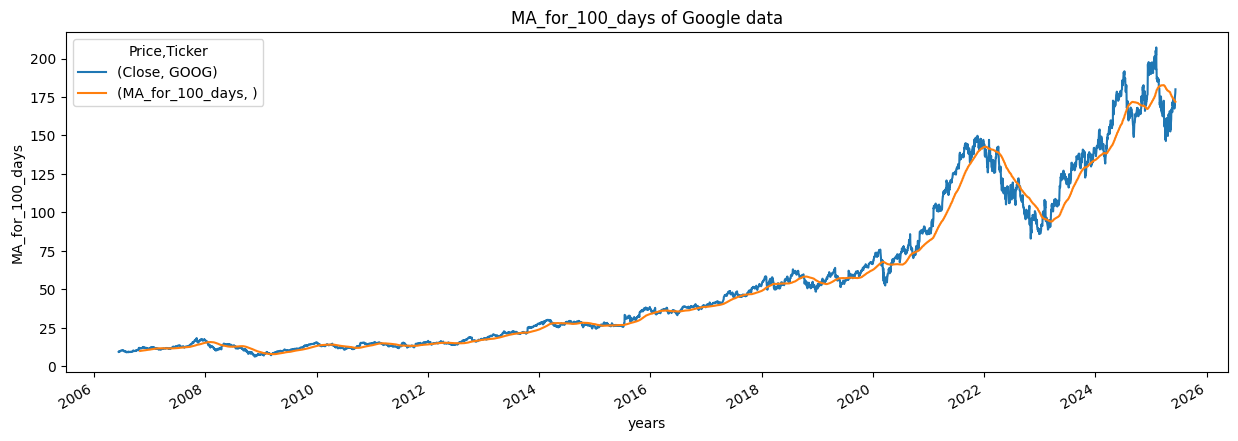

In [23]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

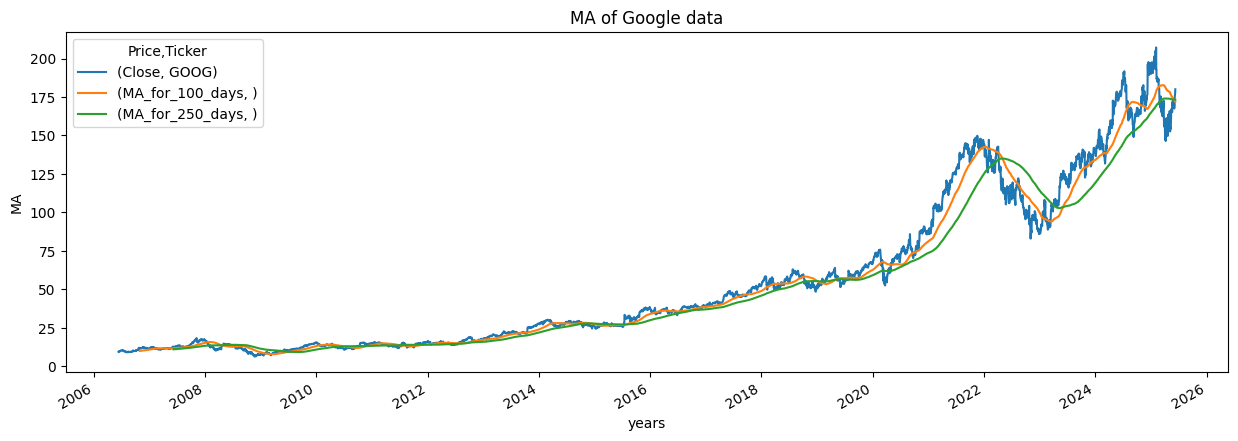

In [24]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [25]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2006-06-12,9.446729,NaN
2006-06-13,9.570030,0.013052
2006-06-14,9.517293,-0.005511
2006-06-15,9.680952,0.017196
2006-06-16,9.673525,-0.000767


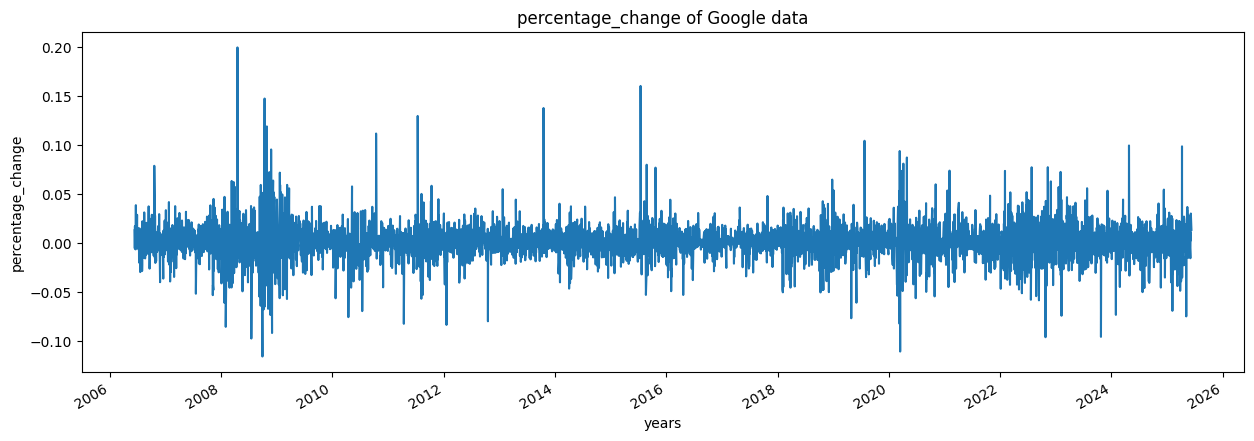

In [26]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [27]:
Close_price = google_data[['Close']]

In [28]:
max(Close_price.values),min(Close_price.values)

(array([207.22454834]), array([6.37407732]))

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close_price)
scaled_data

array([[0.0152982 ],
       [0.0159121 ],
       [0.01564953],
       ...,
       [0.83811561],
       [0.85265385],
       [0.86450341]])

In [30]:
len(scaled_data)

4780

In [31]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [32]:
x_data[0],y_data[0]

(array([[0.0152982 ],
        [0.0159121 ],
        [0.01564953],
        [0.01646436],
        [0.01642738],
        [0.01611181],
        [0.01599223],
        [0.0178364 ],
        [0.01756766],
        [0.01817293],
        [0.01809404],
        [0.01785982],
        [0.01832702],
        [0.01976932],
        [0.01995669],
        [0.02043376],
        [0.02021927],
        [0.02043253],
        [0.02009475],
        [0.0198174 ],
        [0.02060141],
        [0.01970028],
        [0.01866232],
        [0.01800528],
        [0.01854645],
        [0.01794981],
        [0.01745054],
        [0.01598607],
        [0.01635465],
        [0.01645204],
        [0.0162622 ],
        [0.01578636],
        [0.01540421],
        [0.01610934],
        [0.01592196],
        [0.01455486],
        [0.01353416],
        [0.01454007],
        [0.01435023],
        [0.01485565],
        [0.01523164],
        [0.01473115],
        [0.01439338],
        [0.01369072],
        [0.01380536],
        [0

In [33]:
int(len(x_data)*0.7)

3276

In [34]:
4908-100-int(len(x_data)*0.7)

1532

In [35]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3276, 100, 1)
(3276, 1)
(1404, 100, 1)
(1404, 1)


In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [38]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
model.fit(x_train, y_train, batch_size=1, epochs = 5)

Epoch 1/5
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 153s 46ms/step - loss: 2.4798e-04
Epoch 2/5
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 201s 46ms/step - loss: 5.3440e-05
Epoch 3/5
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 204s 46ms/step - loss: 2.9369e-05
Epoch 4/5
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 155s 47ms/step - loss: 4.0251e-05
Epoch 5/5
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 200s 47ms/step - loss: 2.5297e-05


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [42]:
predictions = model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


In [43]:
predictions

array([[0.28270066],
       [0.2866754 ],
       [0.28706646],
       ...,
       [0.7661363 ],
       [0.7911188 ],
       [0.80216837]], dtype=float32)

In [44]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 63.15464],
       [ 63.95297],
       [ 64.03152],
       ...,
       [160.25291],
       [165.27066],
       [167.48997]], dtype=float32)

In [45]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 65.05628967],
       [ 65.18105316],
       [ 64.57566071],
       ...,
       [174.70999146],
       [177.63000488],
       [180.00999451]])

In [46]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [47]:
rmse

np.float64(6.133377671663981)

In [48]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-11-07,65.056290,63.154640
2019-11-08,65.181053,63.952969
2019-11-11,64.575661,64.031517
2019-11-12,64.556274,63.480392
2019-11-13,64.516510,63.487423


<Figure size 640x480 with 0 Axes>

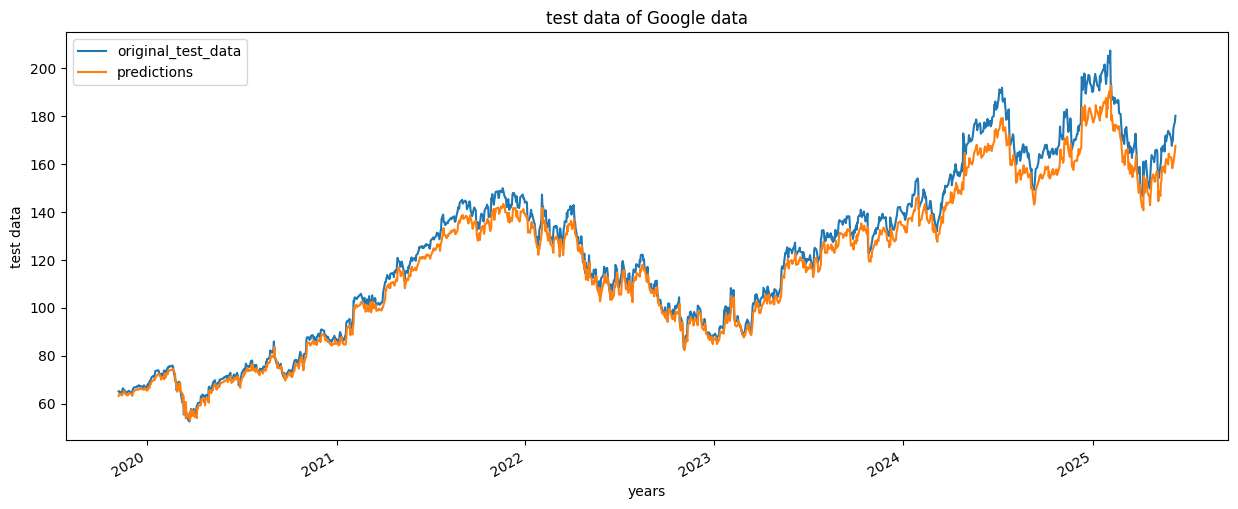

In [49]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

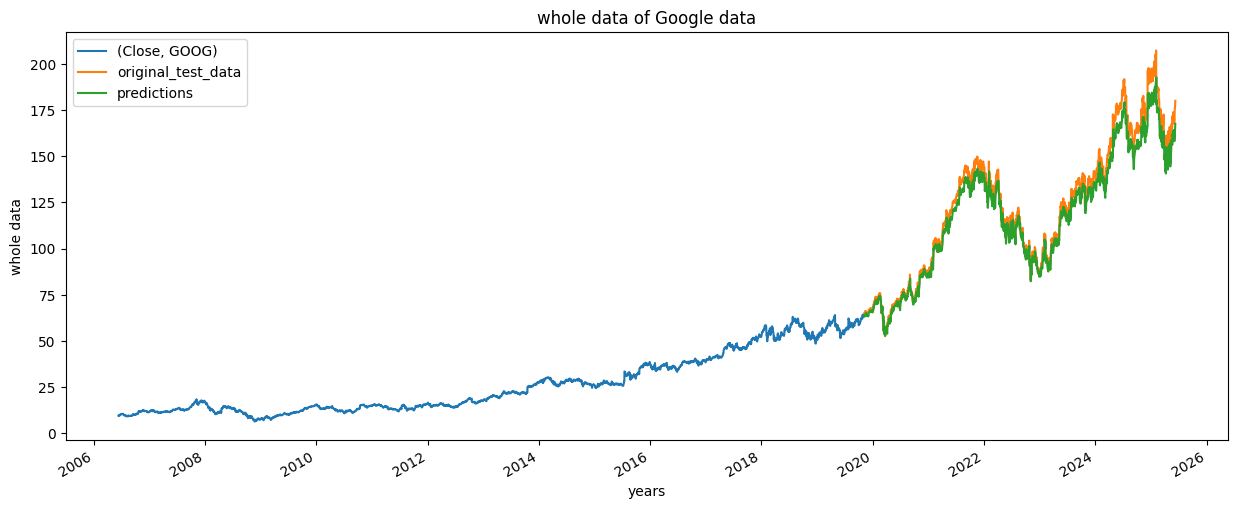

In [50]:
plot_graph((15,6), pd.concat([Close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [51]:
model.save("Latest_stock_price_model.keras")